In [42]:
import pandas as pd
#read in data using pandas
train_df = pd.read_csv("AQI_Delhi.csv",encoding='cp1252')
test_df = pd.read_csv("AQI_Delhi_Test.csv",encoding='cp1252')
#check data has been read in properly
train_df.tail()

,Date,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH,AQI
1192,15/07/2018,18.73,145.67,32.721887,165.65,375.88,25.19,85.08,0.96,48.53,335.266279,625.371304,528.871633,415.688367,615.547143,7,15,196,7,390.826835
1193,16/07/2018,19.61,135.03,15.914445,112.71,422.68,24.94,97.87,1.96,51.11,390.826835,335.266279,625.371304,528.871633,415.688367,1,16,197,7,830.700408
1194,17/07/2018,24.11,128.26,59.445802,463.68,713.95,23.76,175.26,1.88,49.45,830.700408,390.826835,335.266279,625.371304,528.871633,2,17,198,7,782.881739
1195,18/07/2018,20.35,197.55,84.779065,202.14,697.16,21.77,281.35,0.68,55.88,782.881739,830.700408,390.826835,335.266279,625.371304,3,18,199,7,688.028261
1196,19/07/2018,19.45,67.90,110.579462,238.60,631.05,22.62,284.02,1.14,36.16,688.028261,782.881739,830.700408,390.826835,335.266279,4,19,200,7,872.421837


In [43]:
#create a dataframe with all training data except the target column
train_X = train_df.drop(columns=['AQI','Date', 'SO2', 'NO2', 'O3'])
test_X = test_df.drop(columns=['AQI','Date', 'SO2', 'NO2', 'O3'])

#check that the target variable has been removed
train_X.head() 


,SO2,NO2,O3,PM2.5,PM10,AT,WD,WS,RH,AQI1,AQI2,AQI3,AQI4,AQI5,DOW,DOM,DOY,MONTH
0,14.93,79.48,10.17,83.02,482.61,30.16,263.99,1.50,31.26,475.049130,396.315696,326.702405,265.960000,233.431034,5,10,100,4
1,11.17,77.10,13.88,114.30,442.78,29.81,256.34,1.26,36.18,417.901739,475.049130,396.315696,326.702405,265.960000,6,11,101,4
2,28.10,85.62,13.12,251.78,671.70,29.92,160.78,0.97,36.42,746.352174,417.901739,475.049130,396.315696,326.702405,7,12,102,4
3,22.88,61.65,10.91,64.32,161.80,24.30,151.32,1.77,53.08,141.397315,746.352174,417.901739,475.049130,396.315696,1,13,103,4
4,14.95,53.87,15.89,110.57,247.32,24.91,118.04,2.01,58.09,267.807931,141.397315,746.352174,417.901739,475.049130,2,14,104,4


In [44]:
#create a dataframe with only the target column
train_y = train_df[['AQI']]
test_y = test_df[['AQI']]
date = test_df[['Date']]



#view dataframe
train_y.tail()

,AQI
1192,390.826835
1193,830.700408
1194,782.881739
1195,688.028261
1196,872.421837


In [74]:
from keras.models import Sequential
from keras.layers import Dense
#create model
model = Sequential()

#get number of columns in training data
n_cols = train_X.shape[1]

#add model layers
model.add(Dense(15, activation='relu', input_shape=(n_cols,)))
model.add(Dense(15, activation='relu'))
model.add(Dense(1))

In [75]:
#compile model using mse as a measure of model performance
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
weights, biases = model.layers[0].get_weights()
print(weights)

[[ 0.21068347  0.26159745  0.40198284  0.29130733 -0.06048107  0.11781818
   0.4154197   0.34054857 -0.1242125  -0.11209834  0.31360608  0.06005991
   0.11282408  0.05924475 -0.39615333]
 [ 0.31551522 -0.28792727 -0.13182607 -0.42440173  0.1796735  -0.2950912
  -0.20878747  0.13627344  0.25523257  0.04815018  0.33714128  0.26822436
  -0.40366107  0.2377215  -0.16721025]
 [ 0.07578337 -0.31315482  0.3894176  -0.12129295  0.09410924  0.21851206
   0.41062462 -0.1960728  -0.32360435 -0.02948973  0.15940654 -0.31051475
  -0.15946645  0.11264306 -0.26391107]
 [ 0.25976586  0.38692504 -0.1847627  -0.33113822 -0.02142537 -0.09843913
  -0.05573002  0.08326077 -0.3758989   0.15946329  0.06449765 -0.06481564
   0.32426244 -0.17810892 -0.39354518]
 [ 0.2958697  -0.15404063  0.10710919  0.2794187  -0.07382178 -0.0889428
  -0.29173404 -0.41083008  0.32243353 -0.03928232 -0.05621952 -0.10837924
   0.33462167  0.15076333 -0.07878706]
 [-0.19087838  0.3728332  -0.09532818  0.08875138 -0.07493794  0.05

In [77]:
from keras.callbacks import EarlyStopping
#set early stopping monitor so the model stops training when it won't improve anymore
early_stopping_monitor = EarlyStopping(patience=30)
#train model
model.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1197/1197 [==============================] - 0s 330us/step - loss: 134654.6907
Epoch 2/300
1197/1197 [==============================] - 0s 34us/step - loss: 40375.4639
Epoch 3/300
1197/1197 [==============================] - 0s 38us/step - loss: 36079.0690
Epoch 4/300
1197/1197 [==============================] - 0s 41us/step - loss: 33656.9902
Epoch 5/300
1197/1197 [==============================] - 0s 40us/step - loss: 32306.3366
Epoch 6/300
1197/1197 [==============================] - 0s 35us/step - loss: 31298.3333
Epoch 7/300
1197/1197 [==============================] - 0s 39us/step - loss: 31070.1575
Epoch 8/300
1197/1197 [==============================] - 0s 38us/step - loss: 30161.2290
Epoch 9/300
1197/1197 [==============================] - 0s 39us/step - loss: 29857.5384
Epoch 10/300
1197/1197 [==============================] - 0s 39us/step - loss: 29889.1732
Epoch 11/300
1197/1197 [==============================] - 0s 35us/step - loss: 29659.3270
Epoch 12/300
1197

1197/1197 [==============================] - 0s 35us/step - loss: 27055.7123
Epoch 93/300
1197/1197 [==============================] - 0s 36us/step - loss: 26708.7134
Epoch 94/300
1197/1197 [==============================] - 0s 33us/step - loss: 26603.7864
Epoch 95/300
1197/1197 [==============================] - 0s 37us/step - loss: 26639.8758
Epoch 96/300
1197/1197 [==============================] - 0s 43us/step - loss: 26534.7334
Epoch 97/300
1197/1197 [==============================] - 0s 50us/step - loss: 26574.9330
Epoch 98/300
1197/1197 [==============================] - 0s 50us/step - loss: 26693.7144
Epoch 99/300
1197/1197 [==============================] - 0s 49us/step - loss: 26480.4278
Epoch 100/300
1197/1197 [==============================] - 0s 48us/step - loss: 26499.1517
Epoch 101/300
1197/1197 [==============================] - 0s 35us/step - loss: 26852.9508
Epoch 102/300
1197/1197 [==============================] - 0s 35us/step - loss: 26777.6329
Epoch 103/300
1197/1

1197/1197 [==============================] - 0s 38us/step - loss: 25517.2584
Epoch 183/300
1197/1197 [==============================] - 0s 45us/step - loss: 25479.8498
Epoch 184/300
1197/1197 [==============================] - 0s 36us/step - loss: 25192.2418
Epoch 185/300
1197/1197 [==============================] - 0s 33us/step - loss: 25163.9667
Epoch 186/300
1197/1197 [==============================] - 0s 37us/step - loss: 25451.8593
Epoch 187/300
1197/1197 [==============================] - 0s 35us/step - loss: 25230.7303
Epoch 188/300
1197/1197 [==============================] - 0s 33us/step - loss: 25594.3967
Epoch 189/300
1197/1197 [==============================] - 0s 35us/step - loss: 25168.8948
Epoch 190/300
1197/1197 [==============================] - 0s 33us/step - loss: 25571.9267
Epoch 191/300
1197/1197 [==============================] - 0s 33us/step - loss: 25233.6840
Epoch 192/300
1197/1197 [==============================] - 0s 36us/step - loss: 25137.8523
Epoch 193/300

1197/1197 [==============================] - 0s 37us/step - loss: 24484.2122
Epoch 273/300
1197/1197 [==============================] - 0s 55us/step - loss: 24311.6524
Epoch 274/300
1197/1197 [==============================] - 0s 50us/step - loss: 24447.9509
Epoch 275/300
1197/1197 [==============================] - 0s 52us/step - loss: 24451.4342
Epoch 276/300
1197/1197 [==============================] - 0s 50us/step - loss: 24400.5618
Epoch 277/300
1197/1197 [==============================] - 0s 48us/step - loss: 24217.5398
Epoch 278/300
1197/1197 [==============================] - 0s 36us/step - loss: 24743.8081
Epoch 279/300
1197/1197 [==============================] - 0s 33us/step - loss: 24548.4815
Epoch 280/300
1197/1197 [==============================] - 0s 38us/step - loss: 24512.6899
Epoch 281/300
1197/1197 [==============================] - 0s 33us/step - loss: 24647.2342
Epoch 282/300
1197/1197 [==============================] - 0s 46us/step - loss: 24303.4949
Epoch 283/300

In [78]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model.predict(test_X)

In [79]:
l = []
for i in range(10):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [812.6393] [-3.0067604]
654.2379591836731 [737.83344] [-12.777531]
592.5346938775509 [671.45233] [-13.318658]
618.759591836735 [520.76843] [15.836708]
568.1079591836731 [540.1104] [4.9282107]
384.360506329114 [532.79865] [-38.61951]
399.310759493671 [474.89154] [-18.927809]
316.893720930233 [457.01822] [-44.218143]
486.69956521739095 [409.3358] [15.89559]
496.74304347826103 [476.79584] [4.0155983]


In [80]:
l.sort(reverse = True) 
print(l)

[array([15.89559], dtype=float32), array([15.836708], dtype=float32), array([4.9282107], dtype=float32), array([4.0155983], dtype=float32), array([-3.0067604], dtype=float32), array([-12.777531], dtype=float32), array([-13.318658], dtype=float32), array([-18.927809], dtype=float32), array([-38.61951], dtype=float32), array([-44.218143], dtype=float32)]


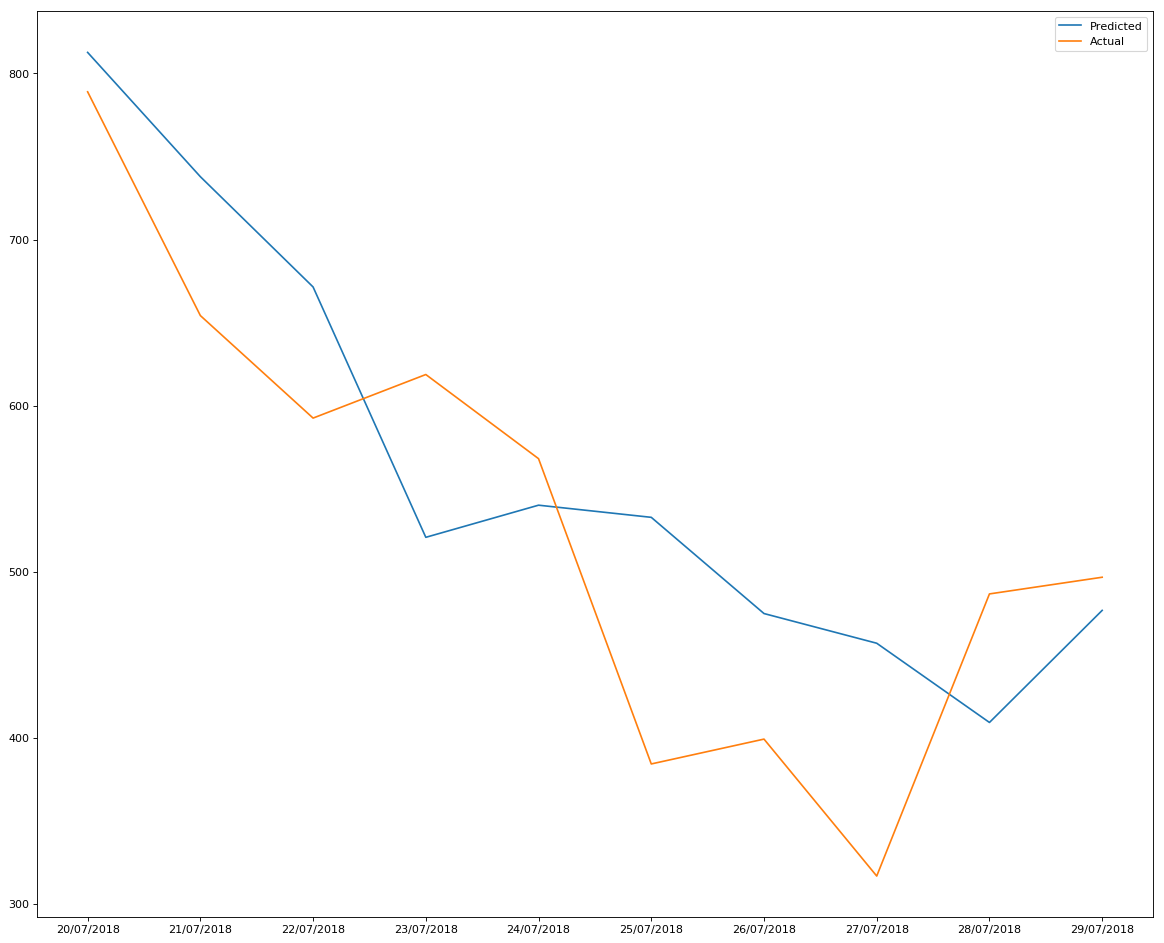

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(date['Date'][i])
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])
    
plt.plot(datelist, predictionlist)
plt.plot(datelist, actuallist)
plt.legend(['Predicted', 'Actual'])
plt.show()

In [11]:
#training a new model on the same data to show the effect of increasing model capacity

#create model
model_mc = Sequential()

#add model layers
model_mc.add(Dense(100, activation='relu', input_shape=(n_cols,)))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(100, activation='relu'))
model_mc.add(Dense(1))

#compile model using mse as a measure of model performance
model_mc.compile(optimizer='adam', loss='mean_squared_error')
#train model
model_mc.fit(train_X, train_y, epochs=300, callbacks=[early_stopping_monitor])

Epoch 1/300
1197/1197 [==============================] - 0s 250us/step - loss: 51277.7023
Epoch 2/300
1197/1197 [==============================] - 0s 43us/step - loss: 31480.6090
Epoch 3/300
1197/1197 [==============================] - 0s 42us/step - loss: 28323.2843
Epoch 4/300
1197/1197 [==============================] - 0s 43us/step - loss: 30412.9515
Epoch 5/300
  32/1197 [..............................] - ETA: 0s - loss: 24917.6562

/home/shivamkapila/anaconda3/lib/python3.7/site-packages/keras/callbacks.py:569: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


1197/1197 [==============================] - 0s 44us/step - loss: 29026.4500
Epoch 6/300
1197/1197 [==============================] - 0s 39us/step - loss: 29128.8155
Epoch 7/300
1197/1197 [==============================] - 0s 48us/step - loss: 28345.3211
Epoch 8/300
1197/1197 [==============================] - 0s 41us/step - loss: 28204.1572
Epoch 9/300
1197/1197 [==============================] - 0s 48us/step - loss: 27240.5165
Epoch 10/300
1197/1197 [==============================] - 0s 39us/step - loss: 28006.6080
Epoch 11/300
1197/1197 [==============================] - 0s 42us/step - loss: 27517.2078
Epoch 12/300
1197/1197 [==============================] - 0s 46us/step - loss: 27082.8454
Epoch 13/300
1197/1197 [==============================] - 0s 43us/step - loss: 27185.7852
Epoch 14/300
1197/1197 [==============================] - 0s 45us/step - loss: 27649.7387
Epoch 15/300
1197/1197 [==============================] - 0s 42us/step - loss: 27835.0631
Epoch 16/300
1197/1197 [===

1197/1197 [==============================] - 0s 41us/step - loss: 14535.9364
Epoch 97/300
1197/1197 [==============================] - 0s 37us/step - loss: 13955.3942
Epoch 98/300
1197/1197 [==============================] - 0s 42us/step - loss: 14068.2026
Epoch 99/300
1197/1197 [==============================] - 0s 42us/step - loss: 13811.6576
Epoch 100/300
1197/1197 [==============================] - 0s 40us/step - loss: 13903.5648
Epoch 101/300
1197/1197 [==============================] - 0s 40us/step - loss: 13082.6318
Epoch 102/300
1197/1197 [==============================] - 0s 41us/step - loss: 17985.8185
Epoch 103/300
1197/1197 [==============================] - 0s 37us/step - loss: 14814.2695
Epoch 104/300
1197/1197 [==============================] - 0s 39us/step - loss: 13935.3999
Epoch 105/300
1197/1197 [==============================] - 0s 41us/step - loss: 13067.2800
Epoch 106/300
1197/1197 [==============================] - 0s 42us/step - loss: 13491.6550
Epoch 107/300
11

1197/1197 [==============================] - 0s 36us/step - loss: 3740.2753
Epoch 187/300
1197/1197 [==============================] - 0s 39us/step - loss: 4396.8672
Epoch 188/300
1197/1197 [==============================] - 0s 39us/step - loss: 4533.0406
Epoch 189/300
1197/1197 [==============================] - 0s 42us/step - loss: 4465.6379
Epoch 190/300
1197/1197 [==============================] - 0s 42us/step - loss: 4328.7106
Epoch 191/300
1197/1197 [==============================] - 0s 43us/step - loss: 3817.2366
Epoch 192/300
1197/1197 [==============================] - 0s 37us/step - loss: 3396.7923
Epoch 193/300
1197/1197 [==============================] - 0s 39us/step - loss: 3571.5405
Epoch 194/300
1197/1197 [==============================] - 0s 36us/step - loss: 3950.0726
Epoch 195/300
1197/1197 [==============================] - 0s 35us/step - loss: 3447.2259
Epoch 196/300
1197/1197 [==============================] - 0s 44us/step - loss: 3269.3536
Epoch 197/300
1197/1197 

1197/1197 [==============================] - 0s 41us/step - loss: 1639.8405
Epoch 278/300
1197/1197 [==============================] - 0s 33us/step - loss: 1655.3443
Epoch 279/300
1197/1197 [==============================] - 0s 46us/step - loss: 1426.0878
Epoch 280/300
1197/1197 [==============================] - 0s 41us/step - loss: 1169.3975
Epoch 281/300
1197/1197 [==============================] - 0s 37us/step - loss: 1010.7623
Epoch 282/300
1197/1197 [==============================] - 0s 42us/step - loss: 1148.5936
Epoch 283/300
1197/1197 [==============================] - 0s 37us/step - loss: 1687.9391
Epoch 284/300
1197/1197 [==============================] - 0s 45us/step - loss: 3104.5201
Epoch 285/300
1197/1197 [==============================] - 0s 34us/step - loss: 2641.0603
Epoch 286/300
1197/1197 [==============================] - 0s 37us/step - loss: 2849.3628
Epoch 287/300
1197/1197 [==============================] - 0s 37us/step - loss: 2617.0668
Epoch 288/300
1197/1197 

In [12]:
#example on how to use our newly trained model on how to make predictions on unseen data (we will pretend our new data is saved in a dataframe called 'test_X').
test_y_predictions = model_mc.predict(test_X)

In [13]:
l = []
for i in range(13):
    l.append(((test_y["AQI"][i] - test_y_predictions[i])/test_y["AQI"][i])*100)
    print(str(test_y["AQI"][i]) +" " + str(test_y_predictions[i]) + " " + str(l[i]))

788.9183673469389 [1156.8457] [-46.63693]
654.2379591836731 [492.70612] [24.690077]
592.5346938775509 [607.9035] [-2.5937445]
618.759591836735 [513.2169] [17.057137]
568.1079591836731 [338.81702] [40.360455]
384.360506329114 [453.06808] [-17.875818]
399.310759493671 [604.5068] [-51.38755]
316.893720930233 [409.4363] [-29.203043]
486.69956521739095 [380.08316] [21.905998]
496.74304347826103 [363.28006] [26.86761]
782.881739130435 [697.66595] [10.884883]
688.028260869565 [491.49023] [28.565401]
614.423913043478 [721.6736] [-17.455326]


In [14]:
l.sort(reverse = True) 
print(l)

[array([40.360455], dtype=float32), array([28.565401], dtype=float32), array([26.86761], dtype=float32), array([24.690077], dtype=float32), array([21.905998], dtype=float32), array([17.057137], dtype=float32), array([10.884883], dtype=float32), array([-2.5937445], dtype=float32), array([-17.455326], dtype=float32), array([-17.875818], dtype=float32), array([-29.203043], dtype=float32), array([-46.63693], dtype=float32), array([-51.38755], dtype=float32)]


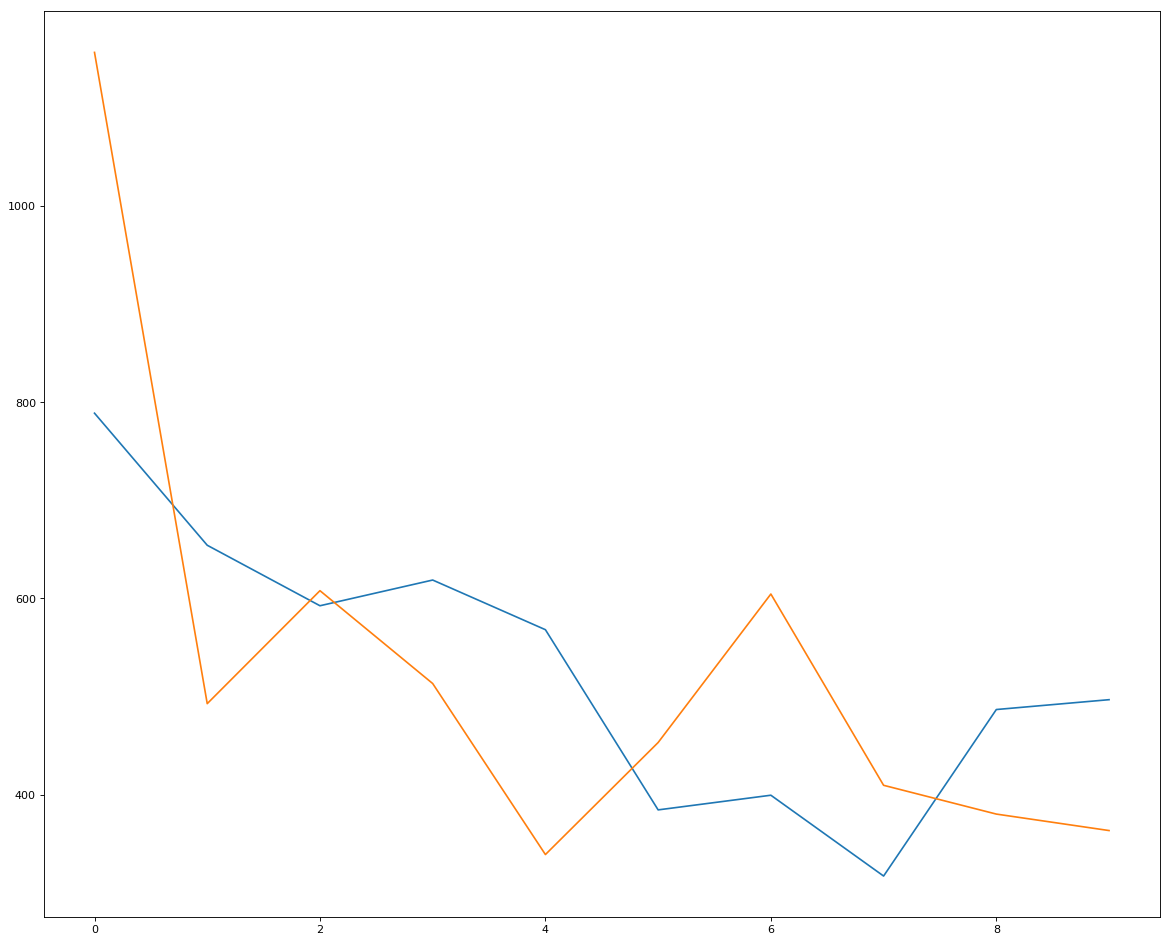

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 15), dpi=80, facecolor='w', edgecolor='k')
datelist = []
predictionlist = []
actuallist = []
for i in range(10):
    datelist.append(i)
    predictionlist.append(test_y_predictions[i][0])
    actuallist.append(test_y['AQI'][i])

plt.plot(datelist, actuallist)
plt.plot(datelist, predictionlist)
plt.show()